Core Concepts:
Null Hypothesis (H0): There's no difference between A and B.

Alternative Hypothesis (H1): B performs differently (usually better) than A.

Statistical test: t-test or non-parametric tests to compare means.

Confidence interval: A range in which the true metric difference lies with a certain level of confidence (usually 95%).

In [ ]:
# Step 1: Simulated Data
import numpy as np
import matplotlib.pyplot as plt

# Simulated CTRs
np.random.seed(42)
control = np.random.binomial(1, 0.10, 1000)  # 10% CTR
treatment = np.random.binomial(1, 0.12, 1000)  # 12% CTR


In [ ]:
# Step 2: Observed Difference
obs_diff = treatment.mean() - control.mean()
print(f"Observed Difference in CTR: {obs_diff:.4f}")


Observed Difference in CTR: 0.0120


In [ ]:
# Step 3: Bootstrapping for Confidence Interval
boot_diffs = []
for _ in range(10000):
    sample_control = np.random.choice(control, size=1000, replace=True)
    sample_treatment = np.random.choice(treatment, size=1000, replace=True)
    boot_diffs.append(sample_treatment.mean() - sample_control.mean())

# 95% Confidence Interval
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)


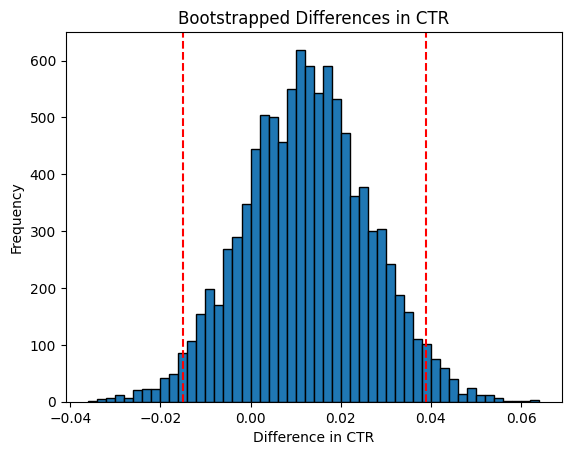

95% Confidence Interval: [-0.0150, 0.0390]


In [9]:
plt.hist(boot_diffs, bins=50, edgecolor='k')
plt.axvline(ci_lower, color='red', linestyle='--')
plt.axvline(ci_upper, color='red', linestyle='--')
plt.title("Bootstrapped Differences in CTR")
plt.xlabel("Difference in CTR")
plt.ylabel("Frequency")
plt.show()

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


In [ ]:
 # What's the probability that CTR is greater than 10%?
# What's the probability that CTR is between 0.09 and 0.11?

from scipy.stats import norm

# Parameters from your test or bootstrapping
mu = np.mean(boot_diffs)
sigma = np.std(boot_diffs)

# Probability CTR > 10%
prob_gt_10 = 1 - norm.cdf(0.10, loc=mu, scale=sigma)

# Probability CTR < 8%
prob_lt_08 = norm.cdf(0.08, loc=mu, scale=sigma)

# Probability CTR between 9% and 11%
prob_between = norm.cdf(0.11, loc=mu, scale=sigma) - norm.cdf(0.09, loc=mu, scale=sigma)

print(f"P(CTR > 10%): {prob_gt_10:.3f}")
print(f"P(CTR < 8%): {prob_lt_08:.3f}")
print(f"P(0.09 < CTR < 0.11): {prob_between:.3f}")


P(CTR > 10%): 0.000
P(CTR < 8%): 1.000
P(0.09 < CTR < 0.11): 0.000
